<a href="https://colab.research.google.com/github/mingeunjo/mini_game/blob/USER/07_09_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# 라이브러리 불러오기
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# 나눔고딕 설치
!apt-get -qq install -y fonts-nanum

# 런타임 재시작 없이 경로 확인
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

font_list = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum/'], fontext='ttf')
nanum_font_path = [f for f in font_list if 'NanumGothic' in f][0]

print("📌 설치된 나눔고딕 경로:", nanum_font_path)

📌 설치된 나눔고딕 경로: /usr/share/fonts/truetype/nanum/NanumGothic.ttf


In [11]:
data_2 = '/content/drive/MyDrive/ColabNotebooks/인사교6기_데이터분석/data/Carseats.csv'

In [12]:
data_1 = pd.read_csv(data_2)
data_1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [13]:
# 통계량 확인
data_1.describe()

# Sales는 TV, Radio, Newpaper에 영향을 받는 종속변수

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


# 종속변수 & 독립변수 시각화

<Axes: title={'center': '광고비가 많을수록 제품 가격이 높아질 것이다.'}, xlabel='Advertising', ylabel='Price'>

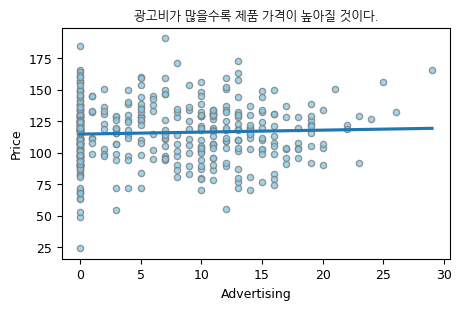

In [40]:
plt.rcParams['figure.figsize'] = (5, 3)
plt.rcParams.update({'font.size': 9})
plt.title('광고비가 많을수록 제품 가격이 높아질 것이다.',fontproperties=font_prop)

sns.regplot(x='Advertising', y='Price', data=data_1,
            order=1, ci=None, scatter_kws={'color' : 'skyblue', 's' : 20, 'edgecolor' : 'grey'})

1. 광고비가 많을수록 제품 가격이 높아질 것이다.
해설: 광고비 증가는 브랜드 인지도와 제품 가치를 높여 소비자가 더 높은 가격을 지불할 가능성을 증가시킨다. 따라서 광고비와 가격은 양의 상관관계가 있을 것으로 기대된다.

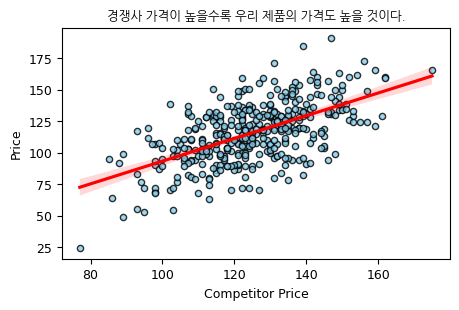

In [37]:
sns.regplot(x='CompPrice', y='Price', data=data_1,
            scatter_kws={'color': 'skyblue', 's': 20, 'edgecolor': 'k'},
            line_kws={'color': 'red'})
plt.title('경쟁사 가격이 높을수록 우리 제품의 가격도 높을 것이다.',fontproperties=font_prop)
plt.xlabel('Competitor Price')
plt.ylabel('Price')
plt.show()

2. 경쟁사의 가격이 높을수록 우리 제품의 가격도 높아질 것이다.
해설: 시장에서 경쟁사 제품 가격이 상승하면, 우리 제품도 비슷한 수준으로 가격을 조정하여 수익성을 유지하려는 경향이 있다. 이는 가격 결정에 경쟁 가격이 중요한 변수임을 의미한다.

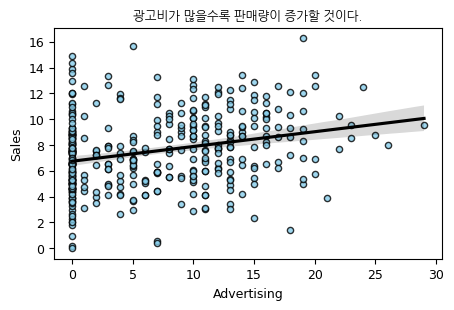

In [38]:
sns.regplot(x='Advertising', y='Sales', data=data_1,
            scatter_kws={'color': 'skyblue', 's': 20, 'edgecolor': 'k'},
            line_kws={'color': 'black'})
plt.title('광고비가 많을수록 판매량이 증가할 것이다.',fontproperties=font_prop)
plt.xlabel('Advertising')
plt.ylabel('Sales')
plt.show()

3. 광고비가 많을수록 판매량이 증가할 것이다.
해설: 광고는 소비자에게 제품 정보를 널리 알리고 구매를 유도하는 역할을 한다. 광고비가 증가하면 소비자의 구매 의사결정에 긍정적 영향을 미쳐 판매량 상승이 예상된다.

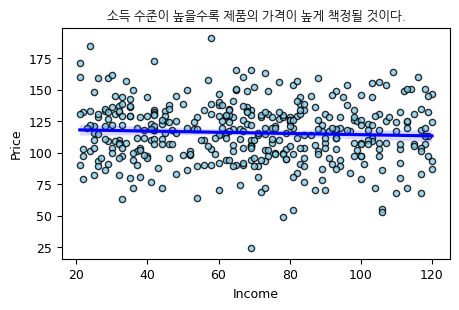

In [39]:
sns.regplot(x='Income', y='Price', data=data_1,
            scatter_kws={'color': 'skyblue', 's': 20, 'edgecolor': 'k'},
            line_kws={'color': 'blue'})
plt.title('소득 수준이 높을수록 제품의 가격이 높게 책정될 것이다.',fontproperties=font_prop)
plt.xlabel('Income')
plt.ylabel('Price')
plt.show()

4. 소득 수준이 높을수록 제품의 가격이 높게 책정될 것이다.
해설: 소득 수준이 높은 지역은 소비 여력이 크기 때문에 기업이 프리미엄 가격 전략을 적용할 수 있다. 이에 따라 지역 소득과 제품 가격 사이에 양의 관계가 존재할 가능성이 크다.

# 단순 회귀



In [15]:
model = smf.ols('Price ~ Advertising', data=data_1)
olsfit = model.fit()
print(olsfit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7910
Date:                Wed, 09 Jul 2025   Prob (F-statistic):              0.374
Time:                        05:43:05   Log-Likelihood:                -1832.5
No. Observations:                 400   AIC:                             3669.
Df Residuals:                     398   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     114.7430      1.674     68.555      

# 다중 회귀

In [45]:
model = smf.ols('Price ~ Advertising + CompPrice  ', data=data_1)
olsfit = model.fit()
print(olsfit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     104.8
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           2.88e-37
Time:                        08:03:22   Log-Likelihood:                -1748.1
No. Observations:                 400   AIC:                             3502.
Df Residuals:                     397   BIC:                             3514.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.2797      7.977      0.160      

# 전진 선택

In [16]:
model = smf.ols('Price ~ Advertising + CompPrice	+ Sales  ', data=data_1)
olsfit = model.fit()
print(olsfit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     210.6
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           1.19e-81
Time:                        05:43:05   Log-Likelihood:                -1642.1
No. Observations:                 400   AIC:                             3292.
Df Residuals:                     396   BIC:                             3308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      24.4089      6.283      3.885      

- 단순 회귀 모델로 봤을 때
R-squared: 약 0.002 ~ 0.347로 낮거나 중간 수준
주요 변수: CompPrice는 통계적으로 매우 유의했으나(p < 0.001), Advertising 등 다른 변수는 유의하지 않음
- 다중 회귀 모델로 봤을 때
R-squared: 0.615로 매우 높음 (61.5%의 가격 변동 설명)
주요 변수: Advertising, CompPrice, Sales 모두 통계적으로 유의미(p < 0.001)

결과 값이 나와서 단순 보다 다중이 더 유의미한 변수결과를 가진것을 알 수 있습니다